# Convolutional Networks
In this assignment we will implement several layer types that are used in convolutional networks. We will then use these layers to train a convolutional network on a small subset of CIFAR-10 data.

In [25]:
# As usual, a bit of setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from lib.classifiers.cnn import *
from lib.data_utils import get_CIFAR10_data
from lib.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from lib.layers import *
from lib.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

np.random.seed(1)

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_val:  (1000L, 3L, 32L, 32L)
X_train:  (49000L, 3L, 32L, 32L)
X_test:  (1000L, 3L, 32L, 32L)
y_val:  (1000L,)
y_train:  (49000L,)
y_test:  (1000L,)


# Convolution: Forward pass
The core of a convolutional network is the convolution operation. In the file `lib/layers.py`, implement the forward pass for the convolution layer in the function `conv_forward`. 

You don't have to worry too much about efficiency; just write the code in whatever way you find most clear.

You can test your implementation by running the following:

In [27]:
x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

conv_param = {'stride': 2, 'pad': 1}
out, _ = conv_forward(x, w, b, conv_param)
correct_out = np.array([[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]])

# Compare your output to ours; difference should be around 2e-8
print('Testing conv_forward')
print('difference: ', rel_error(out, correct_out))

Testing conv_forward
difference:  2.21214764175e-08


# Convolution: Backward pass
Implement the backward pass for the convolution operation in the function `conv_backward` in the file `lib/layers.py`. Again, you don't need to worry too much about computational efficiency.

When you are done, run the following to check your backward pass with a numeric gradient check.

In [28]:
np.random.seed(231)
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'pad': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv_forward(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward(x, w, b, conv_param)[0], b, dout)

out, cache = conv_forward(x, w, b, conv_param)
dx, dw, db = conv_backward(dout, cache)

# Your errors should be around 1e-8'
print('Testing conv_backward function')
print('dx error: ', rel_error(dx, dx_num))
print('dw error: ', rel_error(dw, dw_num))
print('db error: ', rel_error(db, db_num))

Testing conv_backward function
dx error:  1.15980316116e-08
dw error:  2.24710943494e-10
db error:  3.3726400665e-11


# Max pooling: Forward
Implement the forward pass for the max-pooling operation in the function `max_pool_forward` in the file `lib/layers.py`. Again, don't worry too much about computational efficiency.

Check your implementation by running the following:

In [29]:
x_shape = (2, 3, 4, 4)
x = np.linspace(-0.3, 0.4, num=np.prod(x_shape)).reshape(x_shape)
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}

out, _ = max_pool_forward(x, pool_param)

correct_out = np.array([[[[-0.26315789, -0.24842105],
                          [-0.20421053, -0.18947368]],
                         [[-0.14526316, -0.13052632],
                          [-0.08631579, -0.07157895]],
                         [[-0.02736842, -0.01263158],
                          [ 0.03157895,  0.04631579]]],
                        [[[ 0.09052632,  0.10526316],
                          [ 0.14947368,  0.16421053]],
                         [[ 0.20842105,  0.22315789],
                          [ 0.26736842,  0.28210526]],
                         [[ 0.32631579,  0.34105263],
                          [ 0.38526316,  0.4       ]]]])

# Compare your output with ours. Difference should be around 1e-8.
print('Testing max_pool_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing max_pool_forward function:
difference:  4.16666651573e-08


# Max pooling: Backward
Implement the backward pass for the max-pooling operation in the function `max_pool_backward` in the file `lib/layers.py`. You don't need to worry about computational efficiency.

Check your implementation with numeric gradient checking by running the following:

In [30]:
np.random.seed(231)
x = np.random.randn(3, 2, 8, 8)
dout = np.random.randn(3, 2, 4, 4)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = eval_numerical_gradient_array(lambda x: max_pool_forward(x, pool_param)[0], x, dout)

out, cache = max_pool_forward(x, pool_param)
dx = max_pool_backward(dout, cache)

# Your error should be around 1e-12
print('Testing max_pool_backward function:')
print('dx error: ', rel_error(dx, dx_num))

Testing max_pool_backward function:
dx error:  3.27562514223e-12


# Convolutional "sandwich" layers
Previously we introduced the concept of "sandwich" layers that combine multiple operations into commonly used patterns. In the file `lib/layer_utils.py` you will find sandwich layers that implement a few commonly used patterns for convolutional networks.

In [31]:
from lib.layer_utils import conv_relu_pool_forward, conv_relu_pool_backward
np.random.seed(231)
x = np.random.randn(2, 3, 16, 16)
w = np.random.randn(3, 3, 3, 3)
b = np.random.randn(3,)
dout = np.random.randn(2, 3, 8, 8)
conv_param = {'stride': 1, 'pad': 1}
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

out, cache = conv_relu_pool_forward(x, w, b, conv_param, pool_param)
dx, dw, db = conv_relu_pool_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], b, dout)

print('Testing conv_relu_pool')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing conv_relu_pool
dx error:  1.73860048794e-08
dw error:  4.34119246447e-09
db error:  7.50349004263e-10


In [32]:
from lib.layer_utils import conv_relu_forward, conv_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 8, 8)
w = np.random.randn(3, 3, 3, 3)
b = np.random.randn(3,)
dout = np.random.randn(2, 3, 8, 8)
conv_param = {'stride': 1, 'pad': 1}

out, cache = conv_relu_forward(x, w, b, conv_param)
dx, dw, db = conv_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: conv_relu_forward(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_relu_forward(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_relu_forward(x, w, b, conv_param)[0], b, dout)

print('Testing conv_relu:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing conv_relu:
dx error:  2.97057010074e-09
dw error:  4.61360428081e-10
db error:  1.57689947927e-10


# Three-layer ConvNet
Now that you have implemented all the necessary layers, we can put them together into a simple convolutional network.

Open the file `lib/classifiers/cnn.py` and complete the implementation of the `ThreeLayerConvNet` class. Run the following cells to help you debug:

## Sanity check loss
After you build a new network, one of the first things you should do is sanity check the loss. When we use the softmax loss, we expect the loss for random weights (and no regularization) to be about `log(C)` for `C` classes. When we add regularization this should go up.

In [33]:
model = ThreeLayerConvNet()

N = 50
X = np.random.randn(N, 3, 32, 32)
y = np.random.randint(10, size=N)

loss, grads = model.loss(X, y)
print('Initial loss (no regularization): ', loss)

model.reg = 0.5
loss, grads = model.loss(X, y)
print('Initial loss (with regularization): ', loss)

Initial loss (no regularization):  2.30258563876
Initial loss (with regularization):  2.5095647794


## Gradient check
After the loss looks reasonable, use numeric gradient checking to make sure that your backward pass is correct. When you use numeric gradient checking you should use a small amount of artifical data and a small number of neurons at each layer. Note: correct implementations may still have relative errors up to 1e-2.

In [34]:
num_inputs = 2
input_dim = (3, 16, 16)
reg = 0.0
num_classes = 10
np.random.seed(231)
X = np.random.randn(num_inputs, *input_dim)
y = np.random.randint(num_classes, size=num_inputs)

model = ThreeLayerConvNet(num_filters=3, filter_size=3,
                          input_dim=input_dim, hidden_dim=7,
                          dtype=np.float64)
loss, grads = model.loss(X, y)
for param_name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.053965e-04
W2 max relative error: 1.822723e-02
W3 max relative error: 3.422399e-04
b1 max relative error: 3.397321e-06
b2 max relative error: 2.517459e-03
b3 max relative error: 9.711800e-10


## Overfit small data
Another thing we can do in order to check our implementation is to train a model with just a few training samples. You should be able to overfit small datasets, which will result in very high training accuracy and comparatively low validation accuracy. 

It takes a long time to run this part due to the naive implementation of conv and pooling layers. You may take a break and check your plots later.

In [35]:
np.random.seed(231)

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(num_filters=5, filter_size=5, hidden_dim=50, weight_scale=1e-2)

solver = Solver(model, small_data,
                num_epochs=15, batch_size=25,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 30) loss: 2.283650
(Epoch 0 / 15) train acc: 0.220000; val_acc: 0.105000
(Iteration 2 / 30) loss: 2.200124
(Epoch 1 / 15) train acc: 0.380000; val_acc: 0.140000
(Iteration 3 / 30) loss: 2.047663
(Iteration 4 / 30) loss: 2.189709
(Epoch 2 / 15) train acc: 0.340000; val_acc: 0.170000
(Iteration 5 / 30) loss: 1.933008
(Iteration 6 / 30) loss: 1.772877
(Epoch 3 / 15) train acc: 0.380000; val_acc: 0.202000
(Iteration 7 / 30) loss: 1.786161
(Iteration 8 / 30) loss: 1.532846
(Epoch 4 / 15) train acc: 0.440000; val_acc: 0.153000
(Iteration 9 / 30) loss: 1.861550
(Iteration 10 / 30) loss: 1.501285
(Epoch 5 / 15) train acc: 0.500000; val_acc: 0.142000
(Iteration 11 / 30) loss: 1.363615
(Iteration 12 / 30) loss: 1.163014
(Epoch 6 / 15) train acc: 0.720000; val_acc: 0.162000
(Iteration 13 / 30) loss: 1.146968
(Iteration 14 / 30) loss: 0.692165
(Epoch 7 / 15) train acc: 0.700000; val_acc: 0.159000
(Iteration 15 / 30) loss: 1.006953
(Iteration 16 / 30) loss: 1.154513
(Epoch 8 / 15) tr

Plotting the loss, training accuracy, and validation accuracy should show clear overfitting:

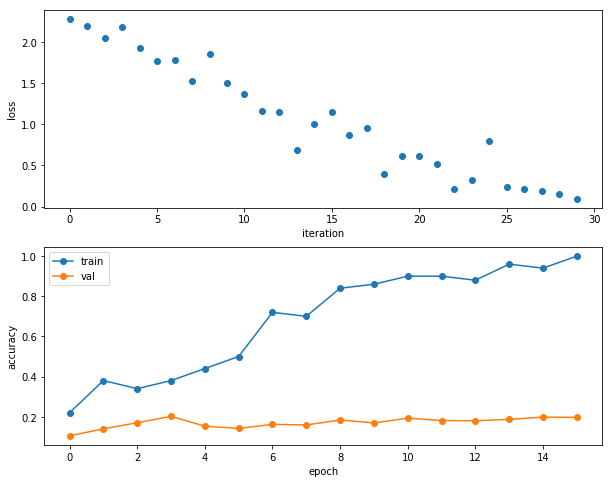

In [36]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()